In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

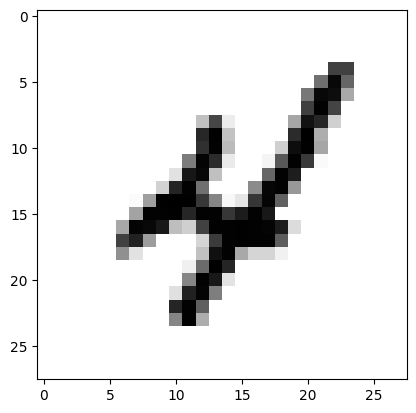

In [ ]:
def draw(n):
	plt.imshow(n,cmap=plt.cm.binary)
	plt.show()

draw(x_train[9])


In [ ]:
# loading the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# preprocess the data
# normalizing pixel values to be 0 and 1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape to add channel dimensions (required for Keras model)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define model and compile the model using (Keras Sequential API) and CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

# Train Model
model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
)

# Evaluat the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.8955 - loss: 0.3340 - val_accuracy: 0.9812 - val_loss: 0.0591
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 34ms/step - accuracy: 0.9848 - loss: 0.0505 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9913 - loss: 0.0297 - val_accuracy: 0.9871 - val_loss: 0.0427
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9927 - loss: 0.0229 - val_accuracy: 0.9896 - val_loss: 0.0369
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9945 - loss: 0.0162 - val_accuracy: 0.9876 - val_loss: 0.0440
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9881 - val_loss: 0.0429
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9902 - val_loss: 0.0373
313/313 - 3s - 11ms/step - accuracy: 0.9906 - loss: 0.0289
Test accuracy: 0.

In [ ]:
# Make the Prediction
prediction = model.predict(x_test[:5])
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[6.6377098e-11 2.1649363e-10 5.3221227e-09 3.1968451e-08 4.9410813e-14
  2.3611007e-13 1.0299423e-15 9.9999994e-01 1.2783032e-10 1.2044407e-09]
 [1.3114746e-08 2.3251753e-08 9.9999994e-01 6.1208512e-14 3.5434829e-11
  1.9302645e-16 3.7498005e-08 9.4317652e-15 2.4480607e-11 2.7688434e-13]
 [3.3851546e-09 9.9999803e-01 6.2692709e-09 4.4823281e-12 1.4045443e-06
  1.0191746e-08 1.1743718e-09 5.3564276e-07 3.8831725e-09 7.9042650e-10]
 [9.9999696e-01 6.2974015e-10 1.8081854e-08 3.8576924e-09 4.1459765e-09
  1.2851550e-09 2.6925243e-06 7.8143785e-09 1.3019482e-07 1.2124063e-07]
 [4.7754439e-10 9.1163983e-09 5.3240783e-11 3.9483295e-12 9.9998873e-01
  6.2009295e-12 1.5395560e-11 2.6880274e-08 2.9375982e-09 1.1180885e-05]
 [2.7948252e-10 9.9999982e-01 2.0049212e-10 6.4324444e-15 1.6479842e-07
  1.3959069e-10 1.0713608e-11 3.4703341e-08 9.3764670e-11 6.6273487e-11]
 [1.3150783e-16 8.5110939e-11 5.9366769e-13 1.2313045e-15 9.9999768e-01
  2.1489638e-11 1.63

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
label ->  1
prediction ->  1


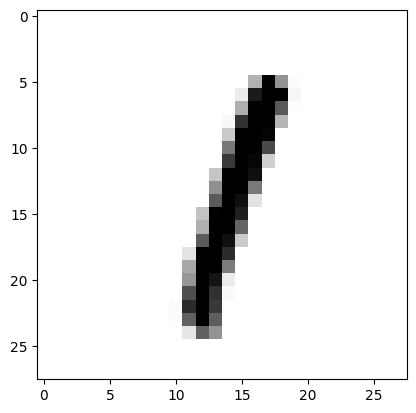

In [ ]:
prediction=model.predict([x_test])
print('label -> ',y_test[5])
print('prediction -> ',np.argmax(prediction[5]))

draw(x_test[5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


<Axes: >

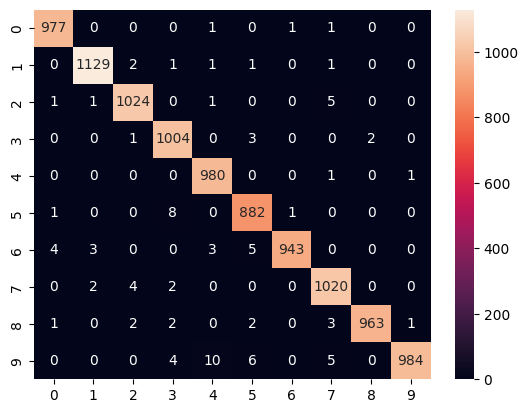

In [ ]:
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')